libraries and data loading

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [61]:
df_original = pd.read_csv('datasets/olist_products_dataset.csv')
df = df_original.copy()

initial visualization

In [62]:
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [63]:
len(df['product_category_name'].unique())

74

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [65]:
df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

fill null values with the median

In [66]:
df['product_category_name'] = df['product_category_name'].fillna('Desconocido')
df['product_name_lenght'] = df['product_name_lenght'].fillna(df['product_name_lenght'].mean())
df['product_description_lenght'] = df['product_description_lenght'].fillna(df['product_description_lenght'].mean())
df['product_photos_qty'] = df['product_photos_qty'].fillna(df['product_photos_qty'].mean())
df['product_weight_g'] = df['product_weight_g'].fillna(df['product_weight_g'].mean())
df['product_length_cm'] = df['product_length_cm'].fillna(df['product_length_cm'].mean())
df['product_height_cm'] = df['product_height_cm'].fillna(df['product_height_cm'].mean())
df['product_width_cm'] = df['product_width_cm'].fillna(df['product_width_cm'].mean())

df.isnull().sum()


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

hot one encoding

In [67]:
encoder = LabelEncoder()
df['categoria_codificada'] = encoder.fit_transform(df['product_category_name'])


scale numeric characteristics

In [68]:
scaler = StandardScaler()
df['peso_scaled'] = scaler.fit_transform(df[['product_weight_g']])


clustering

In [69]:
X = df[['categoria_codificada','peso_scaled']]

kmeans = KMeans(n_clusters=20,random_state=42)
df['cluster'] = kmeans.fit_predict(X)

products recommendation

In [70]:
product_id = 1
cluster_product = df.loc[product_id,'cluster']

recommended_products = df[df['cluster'] == cluster_product]

cluster visualization

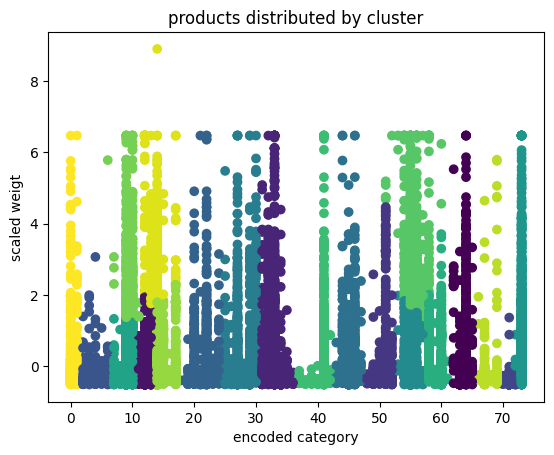

In [71]:
plt.scatter(df['categoria_codificada'], df['peso_scaled'], c=df['cluster'], cmap='viridis')
plt.xlabel('encoded category')
plt.ylabel('scaled weigt')
plt.title('products distributed by cluster')
plt.show()
